In [1]:
import torch as xp
import cuqi
from cuqi.distribution import JointDistribution
import cuqipy_pytorch
from cuqipy_pytorch.distribution import Gaussian, LogGaussian
from cuqipy_pytorch.sampler import NUTS

print(f"PyTorch version: {xp.__version__}")
print(f"CUQIpy version: {cuqi.__version__}")
print(f"CUQIpy-PyTorch version: {cuqipy_pytorch.__version__}")

xp.manual_seed(0); # Set random seed for reproducibility

c:\Users\Nicolai\anaconda3\envs\pytorch3\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch version: 1.11.0
CUQIpy version: 0.4.0
CUQIpy-PyTorch version: 0.2.0


Sample: 100%|██████████| 1500/1500 [00:50, 29.71it/s, step size=3.73e-01, acc. prob=0.883]


[5.6332936]
[12.743955]


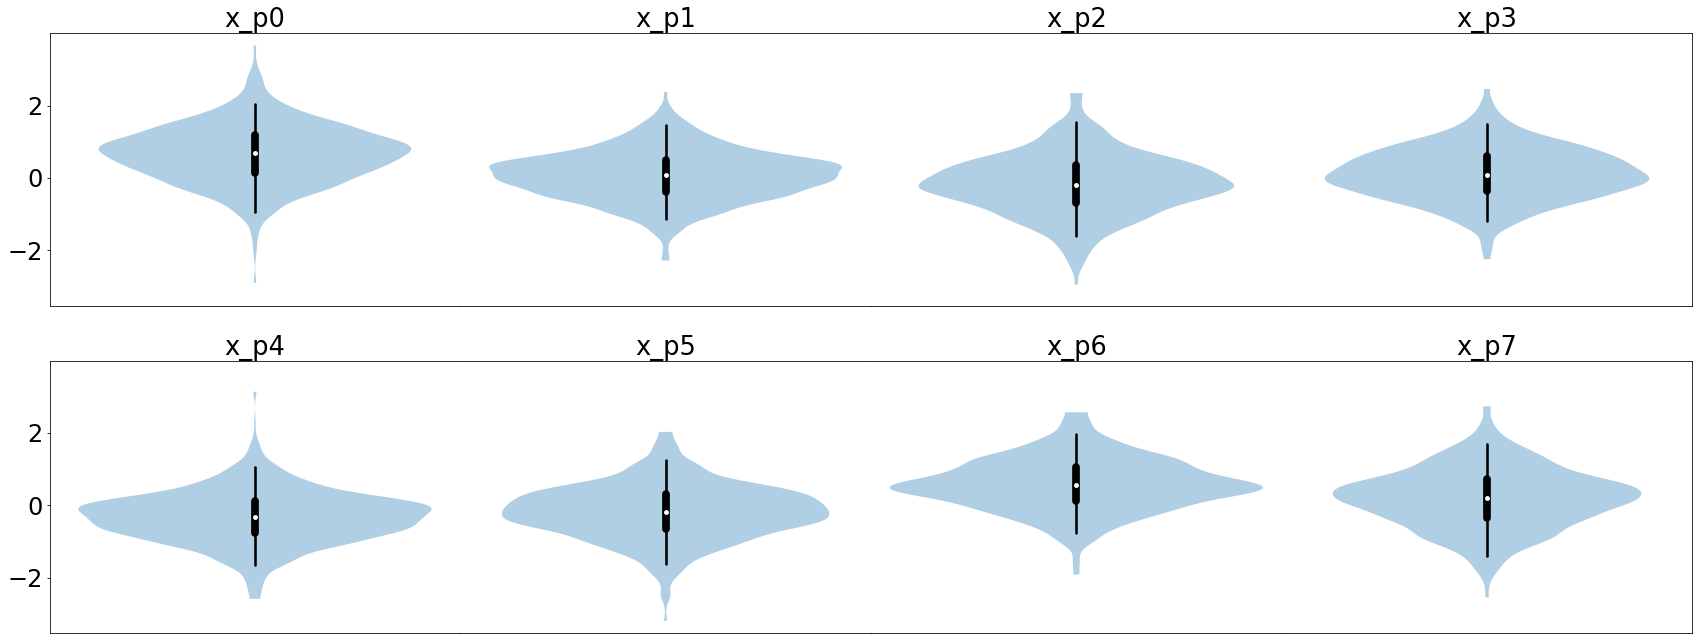

In [2]:
# Observations
y_obs = xp.tensor([28, 8, -3,  7, -1, 1,  18, 12], dtype=xp.float32)
s_obs = xp.tensor([15, 10, 16, 11, 9, 11, 10, 18], dtype=xp.float32)

# Bayesian problem
u     = Gaussian(0, 10**2)
t     = LogGaussian(5, 1)
x_p   = Gaussian(xp.zeros(8), 1)
x     = lambda u, t, x_p: u+t*x_p
y     = Gaussian(x, cov=s_obs**2)

# Posterior sampling
joint = JointDistribution(u, t, x_p, y)  # Define joint distribution 
posterior = joint(y=y_obs)               # Define posterior distribution
sampler = NUTS(posterior)                # Define sampling strategy
samples = sampler.sample(N=1000, Nb=500) # Sample from posterior

# Plot posterior samples
samples["x_p"].plot_violin(textsize=24); 
print(samples["u"].mean()) # Average effect
print(samples["t"].mean()) # Average standard deviation